# **Importing the required libraries needed for the development of the model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# **Loading the dataset**

In [ ]:
h = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart Disease data.csv")

# **Info of the dataset**

In [ ]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Countplot of the target**

1: Heart Disease present
0: Heart Disease absent


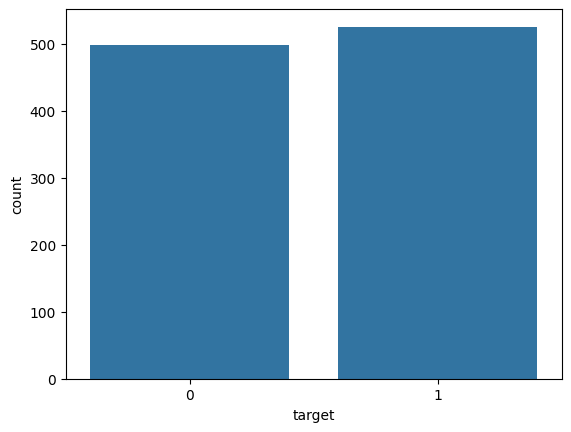

In [ ]:
sns.countplot(x = "target", data = h)
print("1: Heart Disease present")
print("0: Heart Disease absent")

# **Countplot of the target with respect to gender**

sex:
 1:Male 
 0:Female
target:
 1: Heart Disease present 
 0: Heart Disease absent 


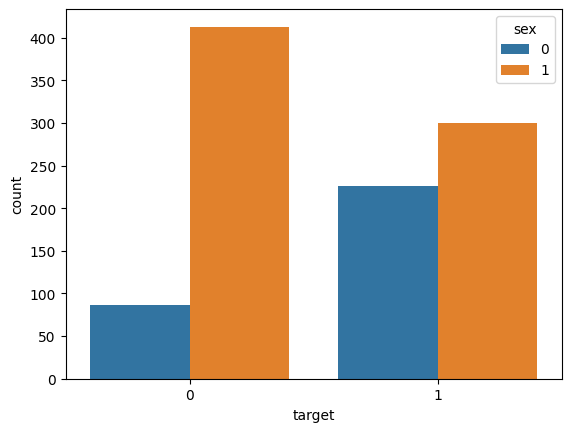

In [ ]:
sns.countplot(x = "target", data = h, hue = 'sex')
print("sex:\n 1:Male \n 0:Female")
print("target:\n 1: Heart Disease present \n 0: Heart Disease absent ")

# **Total count of target values**

In [ ]:
h['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# **Total count of gender**

In [ ]:
h['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

# **heatmap of correlation betweem the variables**

<Axes: >

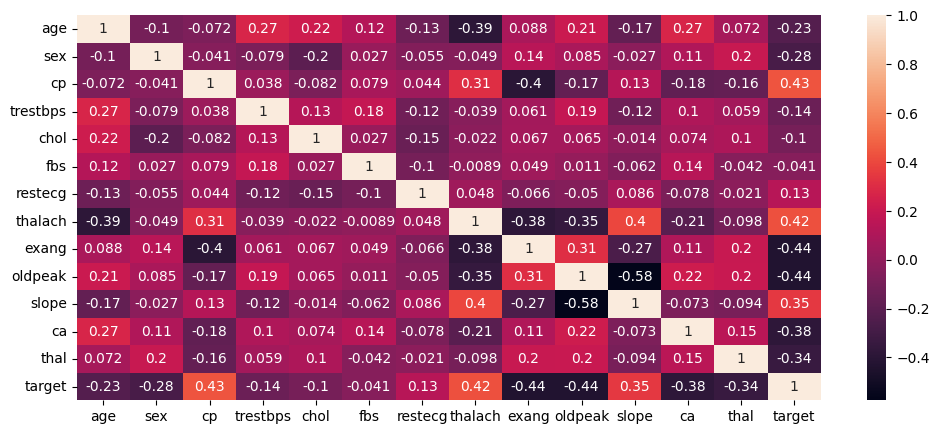

In [ ]:
plt.figure(figsize = (12,5))
sns.heatmap(h.corr(), annot = True)

# **Vioplot of age**

<Axes: xlabel='age'>

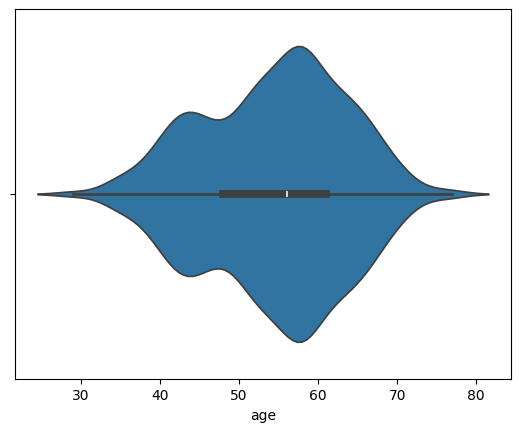

In [ ]:
sns.violinplot(x = 'age', data = h)

# **Boxplot of Target**

<Axes: xlabel='target', ylabel='thalach'>

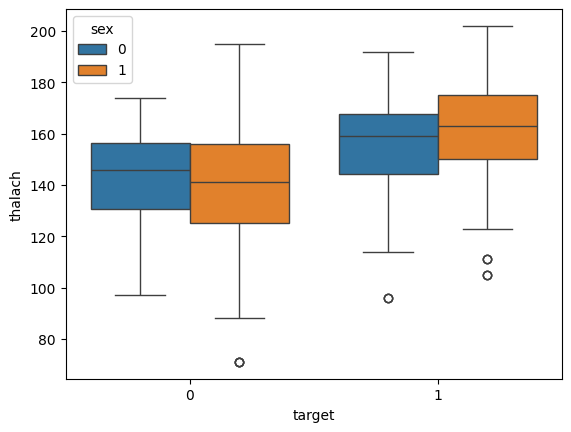

In [ ]:
 sns.boxplot(x = 'target', y = 'thalach', data = h, hue = 'sex')

# **Histplot of age**

<Axes: xlabel='age', ylabel='Count'>

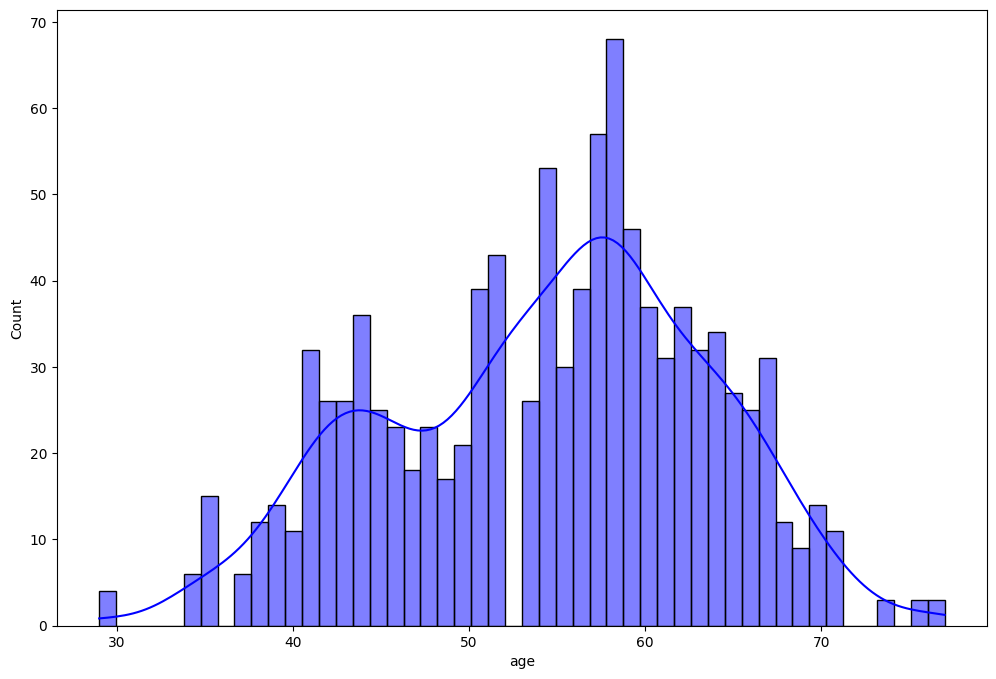

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(h['age'], color = 'b',kde = True, bins = 50)

# **Countplot of cp with respect to gender**

<Axes: xlabel='cp', ylabel='count'>

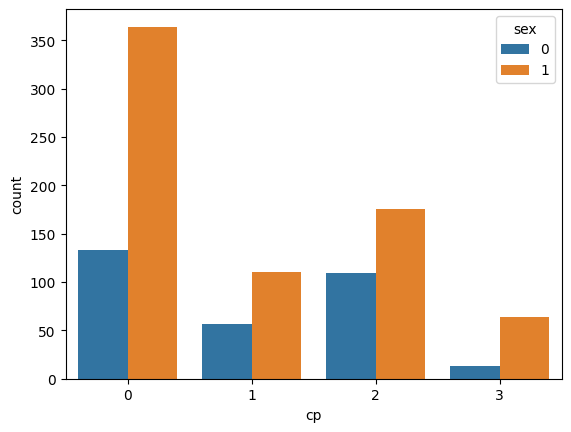

In [ ]:
sns.countplot(x = 'cp', data = h, hue = 'sex')

# **Countplot of rest ecg with respect to gender**

<Axes: xlabel='restecg', ylabel='count'>

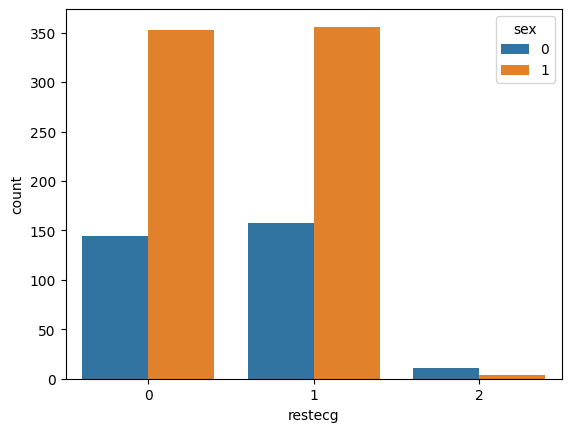

In [ ]:
sns.countplot(x = 'restecg', data = h, hue = 'sex')

# **Displaying the rest ecg variable with respect to age**

<Axes: xlabel='restecg', ylabel='count'>

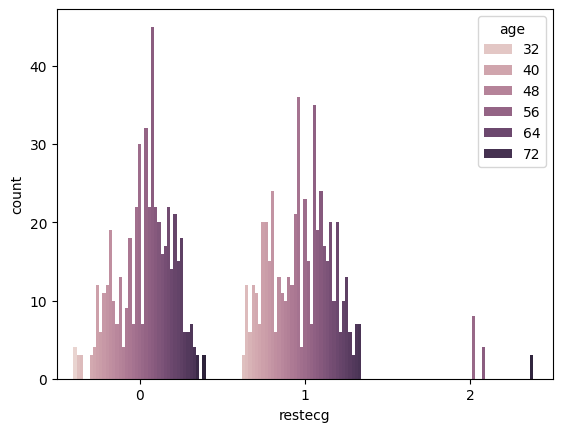

In [ ]:
sns.countplot(x = 'restecg', data = h, hue = 'age')

# **Selecting the target and predictor variable**

In [ ]:
X = h.drop('target', axis = 1)
y = h[['target']]

# **Scaled values**

In [ ]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)
y_scaled = Scaler.fit_transform(y)

In [ ]:
X_scaled.shape

(1025, 13)

In [ ]:
y_scaled.shape

(1025, 1)

# **Printing the scaled values**

In [ ]:
print("X_scaled values:\n", X_scaled)
print("y_scaled values:\n", y_scaled)

X_scaled values:
 [[0.47916667 1.         0.         ... 1.         0.5        1.        ]
 [0.5        1.         0.         ... 0.         0.         1.        ]
 [0.85416667 1.         0.         ... 0.         0.         1.        ]
 ...
 [0.375      1.         0.         ... 0.5        0.25       0.66666667]
 [0.4375     0.         0.         ... 1.         0.         0.66666667]
 [0.52083333 1.         0.         ... 0.5        0.25       1.        ]]
y_scaled values:
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


# **Splitting the dataset into training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

# **Printing the shapes of the sets**

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 13)
(820, 1)
(205, 13)
(205, 1)


# **Developing the model**

In [ ]:
Classifier_model = tf.keras.models.Sequential([Dense(64, activation = 'relu', input_shape = (13,)),
                                               Dense(32, activation = 'relu'),
                                               Dense(32, activation = 'relu'),
                                               Dense(16, activation = 'relu'),
                                               Dense(16, activation = 'relu'),
                                               Dense(8, activation = 'relu'),
                                               Dense(1, activation = 'sigmoid')])
Classifier_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

# **Compiling the model**

In [ ]:
Classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', patience = 2)
Classifier_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, callbacks = [es])

Epoch 1/25
26/26 [==============================] - 16s 66ms/step - loss: 0.6674 - accuracy: 0.5976 - val_loss: 0.6221 - val_accuracy: 0.7122
Epoch 2/25
26/26 [==============================] - 0s 14ms/step - loss: 0.5487 - accuracy: 0.8049 - val_loss: 0.4860 - val_accuracy: 0.7951
Epoch 3/25
26/26 [==============================] - 0s 10ms/step - loss: 0.4078 - accuracy: 0.8378 - val_loss: 0.4019 - val_accuracy: 0.8049
Epoch 4/25
26/26 [==============================] - 0s 10ms/step - loss: 0.3677 - accuracy: 0.8524 - val_loss: 0.3849 - val_accuracy: 0.8341
Epoch 5/25
26/26 [==============================] - 0s 10ms/step - loss: 0.3374 - accuracy: 0.8646 - val_loss: 0.3607 - val_accuracy: 0.8537
Epoch 6/25
26/26 [==============================] - 0s 13ms/step - loss: 0.3390 - accuracy: 0.8683 - val_loss: 0.3643 - val_accuracy: 0.8780
Epoch 7/25
26/26 [==============================] - 1s 21ms/step - loss: 0.3193 - accuracy: 0.8671 - val_loss: 0.3390 - val_accuracy: 0.8683
Epoch 8/25
2

# **Plotting the history of the model**

<Axes: >

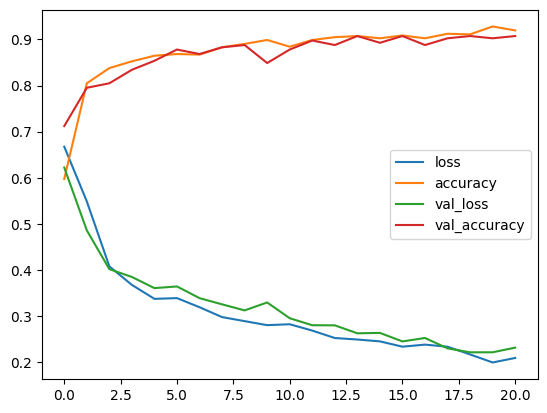

In [ ]:
hist = Classifier_model.history.history
new_hist = pd.DataFrame(hist)
new_hist.plot()

# **Calculating the predictions**

In [ ]:
y_test_predict = Classifier_model.predict(X_test)
y_train_predict = Classifier_model.predict(X_train)

26/26 [==============================] - 0s 2ms/step


In [ ]:
y_test_predict = y_test_predict > 0.5
y_train_predict = y_train_predict > 0.5

In [ ]:
cm = confusion_matrix(y_test_predict, y_test)
cm2 = confusion_matrix(y_train_predict, y_train)

# **Confusion matrix of testing set**

<Axes: >

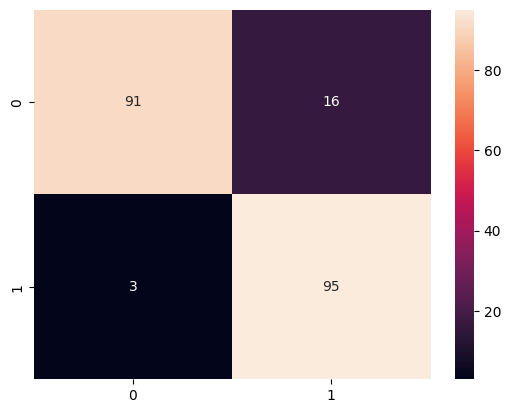

In [ ]:
sns.heatmap(cm, annot = True)

# **Confusion matrix of training set**

<Axes: >

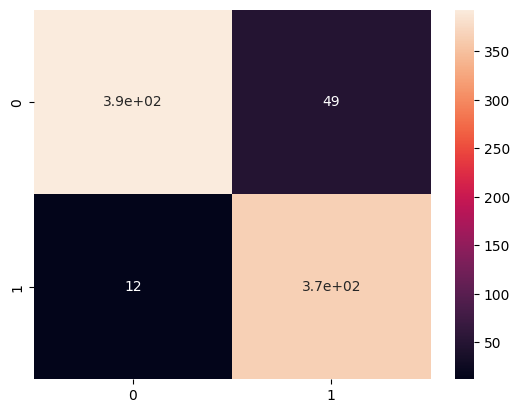

In [ ]:
sns.heatmap(cm2, annot = True)

# **Classification report of the model**

In [ ]:
print("Training Report:\n", classification_report(y_test_predict, y_test))
print("Testing Report:\n", classification_report(y_train_predict, y_train))

Training Report:
               precision    recall  f1-score   support

       False       0.97      0.85      0.91       107
        True       0.86      0.97      0.91        98

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

Testing Report:
               precision    recall  f1-score   support

       False       0.97      0.89      0.93       442
        True       0.88      0.97      0.92       378

    accuracy                           0.93       820
   macro avg       0.93      0.93      0.93       820
weighted avg       0.93      0.93      0.93       820



# **Saving the model**

In [ ]:
Classifier_model.save("Heart_Disease_Predictor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Storing the scaler**

In [ ]:
import pickle
pickle.dump(Scaler,open("scaler.pkl", "wb"))

In [ ]:
model = load_model("Heart_Disease_Predictor.h5")

# **Deployment function for the model**

In [ ]:
def return_prediction(model, Scaler, sample_json):
  a = sample_json['age']
  s = sample_json['sex']
  c = sample_json['trestbps']
  o = sample_json['chol']
  f = sample_json['fbs']
  r = sample_json['restecg']
  t = sample_json['thalach']
  e = sample_json['exang']
  p = sample_json['oldpeak']
  st = sample_json['slope']
  cc = sample_json['ca']
  l = sample_json['thal']
  dc = [[a,s,c,o,f,r,t,e,p,st,cc,l]]
  dc = Scaler.fit_transform(dc)
  predict = model.predict(dc)
  classes = np.argmax(predict, axis = 1)
  return classes